In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tweepy

## Gathering Data

In [3]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
myfile = url.split('/')[-1]
# response
request = requests.get(url)
# print(r.status_code)
# writing the content to a file
# first: Check if the file is already exist
if not os.path.isfile(myfile):
    with open(myfile, 'wb') as file:
        file.write(request.content)

In [13]:
# let us load the image predicted to dataframe
# load the file to dataframe
image_predictions_df = pd.read_csv(myfile, sep='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
df_list = []
count = 0
file_name = 'tweet-json.txt'
with open(file_name, encoding='utf-8') as file:
    for file_line in file:
        count +=1
        json_file = file.readline()
        data = (json.loads(file_line))
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                                 'retweet_count':retweet_count,
                                 'favorite_count':favorite_count})
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

In [17]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,891815181378084864,4328,25461
2,891327558926688256,9774,41048
3,890971913173991426,2158,12041
4,890609185150312448,4429,28226
...,...,...,...
1172,666058600524156928,61,115
1173,666055525042405380,261,448
1174,666050758794694657,60,136
1175,666044226329800704,147,311


## Asessing Data visually and programmatically

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [7]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [8]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [9]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [10]:
df[df.name.apply(len) < 2]['name']

56      a
649     a
775     O
801     a
1002    a
1004    a
1017    a
1049    a
1193    a
1207    a
1340    a
1351    a
1361    a
1368    a
1382    a
1499    a
1737    a
1785    a
1853    a
1854    a
1877    a
1878    a
1923    a
1941    a
1955    a
1994    a
2034    a
2066    a
2116    a
2125    a
2128    a
2146    a
2153    a
2161    a
2191    a
2198    a
2211    a
2218    a
2222    a
2235    a
2249    a
2255    a
2264    a
2273    a
2287    a
2304    a
2311    a
2314    a
2327    a
2334    a
2347    a
2348    a
2350    a
2352    a
2353    a
2354    a
Name: name, dtype: object

In [11]:
df[df.name.apply(len) < 3]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [19]:
df3.duplicated().any()

False

### Tidiness Issues

1. Image_prediction table, and retweet_count table(df3) should be merged with twitter archive
2. The different classification of the dogs(doggo,floofer,pupper,puppo) should be in one column

### Quality Issues

**Twitter archive table**
3. Rating numerator should be 10 and above, some Invalid rating numerator
4. Rating denominator should be 10, some invalid rating denominator

### Tidiness Issue
5. The rating numerator and denominator should be in one column as (rating/denominator)

### Quality Issues
7. Some dog's name are invalid. Dog's names appearing as "a","O", an, by should be removed
8. False p1_dog is usually not a dog, it should be removed
9. Change none values in Name and dog_class columns to NaN
10. Remove columns with missing/invalid rows i.e. in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id
    retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,img_num.
11. Change the names of unclear columns (p1, p1_conf, p1_dog etc) 


### Creating copies

In [20]:
df_arch_clean = df.copy()

In [21]:
df_imag_clean = image_predictions_df.copy()

In [22]:
df_api_clean = df3.copy()

## Step 3 - Cleanning Data

### Define

Merging retweet count table (df_api_clean) with the twitter archive table(df_arch_clean)

### Code

In [23]:
df_arch_clean = df_arch_clean.merge(df_api_clean, on = 'tweet_id')

### Test

In [24]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']

### Define
Merging the image predictor table (df_imag_clean) with the twitter archive table

### Code

In [28]:
df_arch_clean = df_arch_clean.merge(df_imag_clean, on = 'tweet_id')

### Test

In [29]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_class',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Define
*Merging the different columns of the dogs(doggo,floofer,pupper,puppo) into one column named "dog_class"

### Code

In [25]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [column for column in list(df_arch_clean.columns) if column not in melt_columns]

# Melt the columns
df_arch_clean = pd.melt(df_arch_clean, id_vars=stay_columns,
                                var_name='class', value_name='dog_class')

# Drop the class column
df_arch_clean.drop(axis=1, columns=['class'], inplace=True)

# Remove the duplicated rows, that stem from the Melting step
df_arch_clean= df_arch_clean[~df_arch_clean.duplicated()]


In [26]:
# Remove duplicated tweet id for None values after melting
duplicates = df_arch_clean[(df_arch_clean.tweet_id.duplicated(keep=False)) & (df_arch_clean.dog_class == 'None')]
df_arch_clean.drop(duplicates.index, inplace=True)

# Remove duplicate tweet id
df_arch_clean = df_arch_clean[~df_arch_clean.tweet_id.duplicated()]

### Test

In [27]:
list(df_arch_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_class']

### Define
Removing rating_numerators less than 10

### Code

In [30]:
df_arch_clean= df_arch_clean[df_arch_clean.rating_numerator >= 10 ]

### Test

In [31]:
df_arch_clean.rating_numerator.value_counts()

12     246
10     216
11     195
13     138
14      19
99       1
420      1
26       1
143      1
45       1
80       1
204      1
50       1
165      1
75       1
84       1
15       1
27       1
Name: rating_numerator, dtype: int64

### Define
Removing rating_numerators greater than 15

### Code

In [32]:
#removing all numerators greater than 15
df_arch_clean= df_arch_clean[df_arch_clean.rating_numerator <= 15 ]

### Test

In [33]:
df_arch_clean.rating_numerator.value_counts()

12    246
10    216
11    195
13    138
14     19
15      1
Name: rating_numerator, dtype: int64

### Test

In [34]:
# checking to make sure all denominators are 10
df_arch_clean.rating_denominator.value_counts()

10    815
Name: rating_denominator, dtype: int64

### Define
Merging the rating numerator and the rating denominator into one column named ratings 

### Code

In [35]:
#merging the numerator and denominator ratings
df_arch_clean['ratings'] = df_arch_clean['rating_numerator'].astype(str) + "/" + df_arch_clean['rating_denominator'].astype(str)

### Test

In [36]:
df_arch_clean.ratings.value_counts()

12/10    246
10/10    216
11/10    195
13/10    138
14/10     19
15/10      1
Name: ratings, dtype: int64

### Define
Removing names of dogs that are are appearing as "a" and "O"

### Code

In [37]:
df_arch_clean= df_arch_clean[df_arch_clean.name.apply(len) >= 2 ]

### Test

In [38]:
df_arch_clean[df_arch_clean.name.apply(len) <  2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings


In [39]:
df_arch_clean.name.value_counts()

None       228
Charlie      7
Penny        6
Oliver       6
Lucy         5
          ... 
Louie        1
Tito         1
Chevy        1
Aja          1
Kilo         1
Name: name, Length: 432, dtype: int64

In [40]:
df_arch_clean[df_arch_clean.name.apply(len) < 3]['name']

146    Mo
166    Bo
203    Bo
248    Bo
278    an
301    Al
316    my
327    Bo
370    Bo
521    an
648    by
746    Ed
851    an
Name: name, dtype: object

### Define
Removing names of dogs that are "an" and "by" 

### Code

In [41]:
#removing invalid dog name i.e an, by
df_arch_clean = df_arch_clean[df_arch_clean ["name"].str.contains("an|by") == False]

### Test

In [42]:
df_arch_clean[df_arch_clean.name.apply(len) < 3]['name']

146    Mo
166    Bo
203    Bo
248    Bo
301    Al
316    my
327    Bo
370    Bo
746    Ed
Name: name, dtype: object

### Define
Removing the false entry for p1_dog because it usually is not a dog

### Code

In [43]:
# removing all the false statement in p1_dog
df_arch_clean= df_arch_clean[df_arch_clean.p1_dog == True ]

### Test

In [46]:
df_arch_clean.p1_dog.value_counts()

True    601
Name: p1_dog, dtype: int64

### Define
Changing the None values in name and dog_class column to a NaN

### Code

In [47]:
# changing the none values to nan for both name and dog_class column
name_index = df_arch_clean[df_arch_clean.name == 'None'].index
df_arch_clean.loc[name_index, 'name'] = np.nan

dog_index = df_arch_clean[df_arch_clean.dog_class == 'None'].index
df_arch_clean.loc[dog_index, 'dog_class'] = np.nan

### Test

In [48]:
len(df_arch_clean[df_arch_clean.name == 'None'])

0

In [49]:
len(df_arch_clean[df_arch_clean.dog_class == 'None'])

0

### Define
Dropping invalid columnn (in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp', img_num)

### Code

In [50]:
#removing the column that are not important for analysis
removed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'timestamp','img_num' ]
df_arch_clean.drop(columns=removed, axis=1, inplace=True)

## Test

In [51]:
list(df_arch_clean.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_class',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'ratings']

In [53]:
#removing the column for rating numerator and denominator leaving behind the single column "ratings"
df_arch_clean.drop(columns= ['rating_numerator','rating_denominator'] , axis=1, inplace=True)

In [54]:
list(df_arch_clean.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_class',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'ratings']

## Define
Changing unclear column names p1,p2,p3

## Code

In [61]:
df_arch_clean.rename(columns={'p1':'1st_predict', 'p1_conf':'predict_confidence', 'p1_dog':'predict_confirm',
                             'p2':'2nd_predict','p2_conf':'predict_confidence2', 'p2_dog': 'predict_confirm2',
                             'p3': '3rd_predict', 'p3_conf': 'predict_confidence3', 'p3_dog':'predict_confirm3'}, inplace=True) 

## Test

In [62]:
list(df_arch_clean.columns)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'name',
 'retweet_count',
 'favorite_count',
 'dog_class',
 'jpg_url',
 '1st_predict',
 'predict_confidence',
 'predict_confirm',
 '2nd_predict',
 'predict_confidence2',
 'predict_confirm2',
 '3rd_predict',
 'predict_confidence3',
 'predict_confirm3',
 'ratings']

In [58]:
df_arch_clean.shape

(601, 19)

In [63]:
df_arch_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [65]:
df= pd.read_csv('twitter_archive_master.csv')

In [66]:
df.head()

,tweet_id,source,text,expanded_urls,name,retweet_count,favorite_count,dog_class,jpg_url,1st_predict,predict_confidence,predict_confirm,2nd_predict,predict_confidence2,predict_confirm2,3rd_predict,predict_confidence3,predict_confirm3,ratings
0,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4328,25461,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10
1,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,2158,12041,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13/10
2,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,4429,28226,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13/10
3,890006608113172480,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,7624,31166,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,13/10
4,888917238123831296,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,Jim,4709,29611,NaN,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,12/10


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

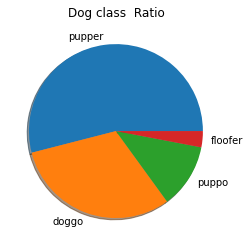

In [73]:
plt.pie(df.dog_class.value_counts(), labels=['pupper', 'doggo', 'puppo', 'floofer'], shadow=True)
plt.title('Dog class  Ratio');

    -The pie chart shows that most of the dogs rated are classified in the pupper stage followed by doggo

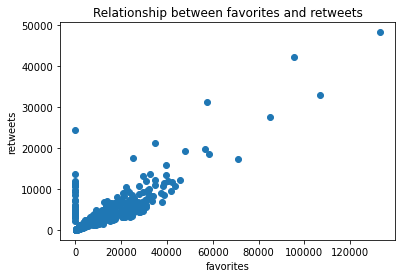

In [96]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Relationship between favorites and retweets')
plt.xlabel('favorites')
plt.ylabel('retweets');

    -This scatter plot shows that there is a positive correlation between the favorite count and the retweet count

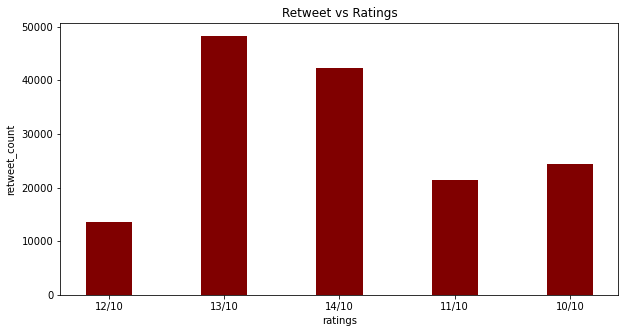

In [102]:
# creating the dataset
ratings_count = df['ratings']
count_retweet = df['retweet_count']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ratings_count, count_retweet, color ='maroon', width = 0.4)

plt.xlabel("ratings")
plt.ylabel("retweet_count")
plt.title("Retweet vs Ratings")
plt.show()


    -From the graph above, it can be seen that there is more retweets for the dogs rated 13/10

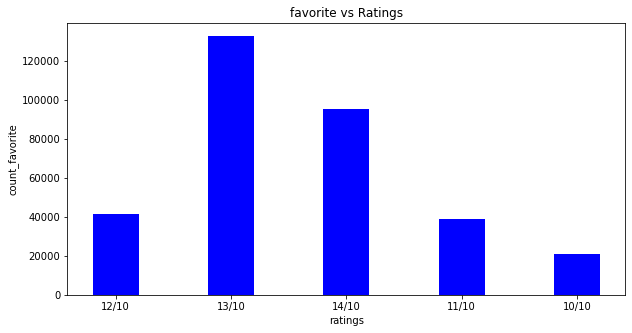

In [104]:
# creating the dataset
ratings_count = df['ratings']
count_favorite = df['favorite_count']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(ratings_count, count_favorite, color ='blue', width = 0.4)

plt.xlabel("ratings")
plt.ylabel("count_favorite")
plt.title("favorite vs Ratings")
plt.show()

    - Just like with the retweets, the dogs rated 13/10 were the most favorite